### MATPLOTLIB: Data Visualization

#### Basic Plots

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
x = np.linspace(0, 10, 50)
print (x, type(x))

[ 0.          0.20408163  0.40816327  0.6122449   0.81632653  1.02040816
  1.2244898   1.42857143  1.63265306  1.83673469  2.04081633  2.24489796
  2.44897959  2.65306122  2.85714286  3.06122449  3.26530612  3.46938776
  3.67346939  3.87755102  4.08163265  4.28571429  4.48979592  4.69387755
  4.89795918  5.10204082  5.30612245  5.51020408  5.71428571  5.91836735
  6.12244898  6.32653061  6.53061224  6.73469388  6.93877551  7.14285714
  7.34693878  7.55102041  7.75510204  7.95918367  8.16326531  8.36734694
  8.57142857  8.7755102   8.97959184  9.18367347  9.3877551   9.59183673
  9.79591837 10.        ] <class 'numpy.ndarray'>


In [5]:
sinus = np.sin(x)
print (sinus, type(sinus))

[ 0.          0.20266794  0.39692415  0.57470604  0.72863478  0.85232157
  0.94063279  0.98990308  0.99808748  0.96484631  0.89155923  0.78126802
  0.63855032  0.46932961  0.2806294   0.08028167 -0.12339814 -0.32195632
 -0.50715171 -0.67129779 -0.80758169 -0.91034694 -0.97532829 -0.99982867
 -0.9828312  -0.92504137 -0.82885774 -0.6982724  -0.53870529 -0.35677924
 -0.16004509  0.04333173  0.24491007  0.43632343  0.6096272   0.75762842
  0.8741843   0.9544572   0.99511539  0.99447137  0.95255185  0.8710967
  0.75348673  0.60460332  0.43062587  0.23877532  0.0370144  -0.16628279
 -0.36267843 -0.54402111] <class 'numpy.ndarray'>


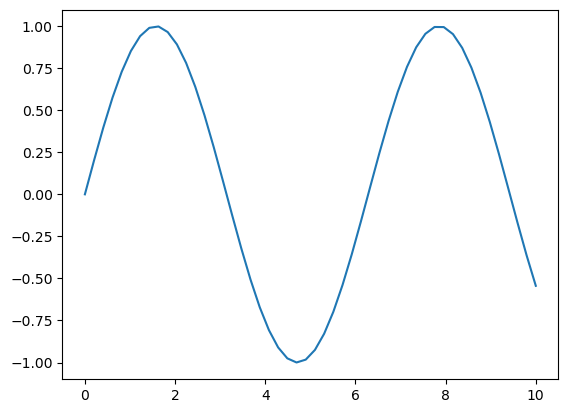

In [8]:
plt.plot(x, sinus)
plt.show()

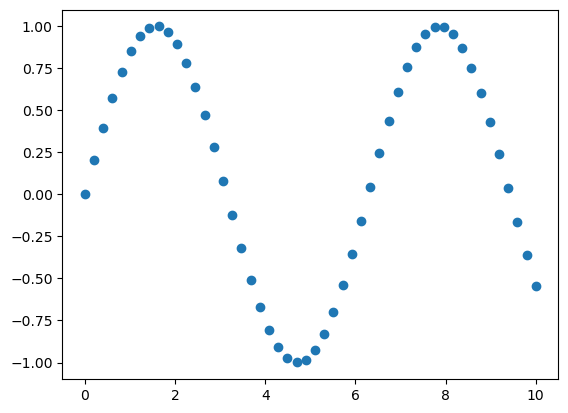

In [9]:
plt.plot(x, sinus, "o")
plt.show()

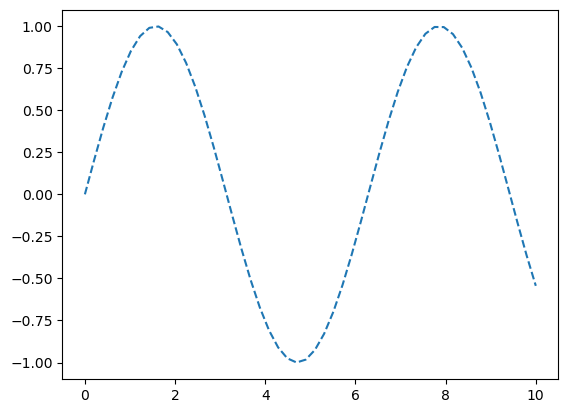

In [10]:
plt.plot(x, sinus, "--")
plt.show()

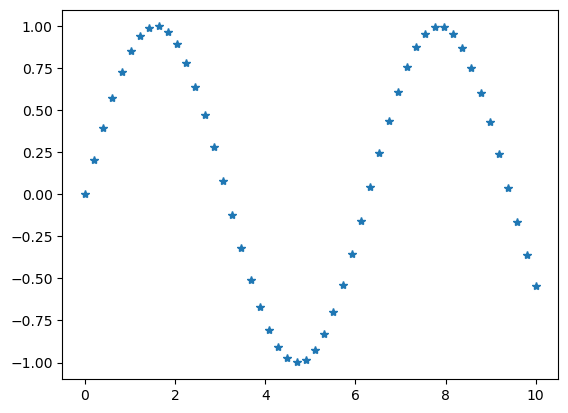

In [11]:
plt.plot(x, sinus, "*")
plt.show()

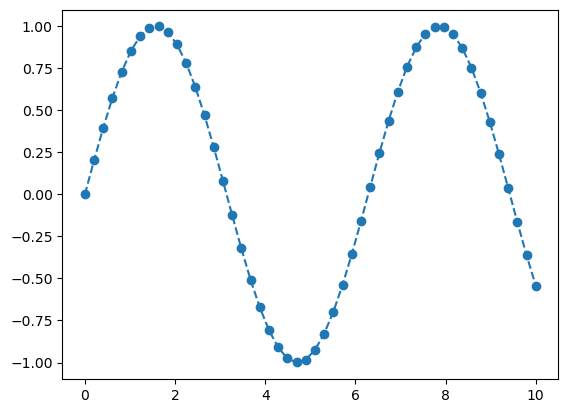

In [19]:
plt.plot(x, sinus, marker = 'o', linestyle = 'dashed')
plt.show()

In [ ]:
help (plt.plot)

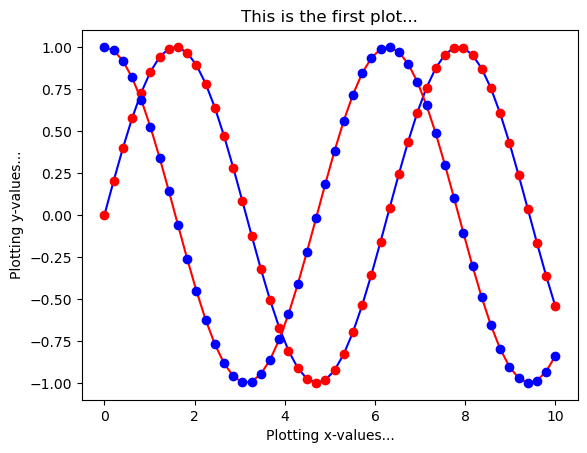

In [29]:
# Rapid multiplot
x = np.linspace(0, 10, 50)
sinus = np.sin(x)
cosinus = np.cos(x)
plt.plot(x, sinus, "-b", x, sinus, "or", x, cosinus, "-r", x, cosinus, "ob")
plt.xlabel("Plotting x-values...")
plt.ylabel("Plotting y-values...")
plt.title("This is the first plot...")
plt.show()

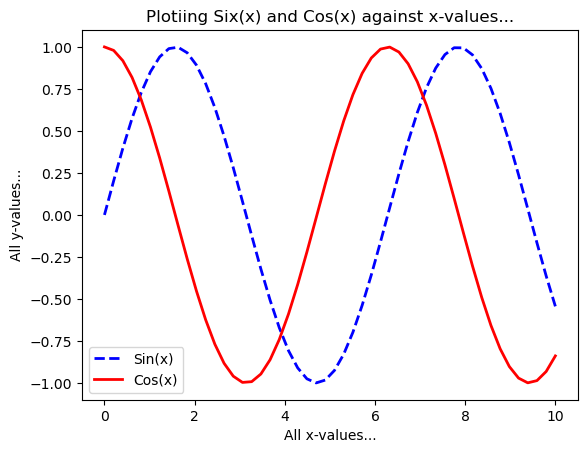

In [35]:
plt.plot(x, sinus, label='Sin(x)', color='blue', linestyle='--', linewidth=2)
plt.plot(x, cosinus, label='Cos(x)', color='red', linestyle='-', linewidth=2)
plt.xlabel("All x-values...")
plt.ylabel("All y-values...")
plt.title("Plotiing Six(x) and Cos(x) against x-values...")
plt.legend()
plt.show()

#### Scatter (2D) plots

In [2]:
import pandas as pd
try:
    salary = pd.read_csv('./salary_table.csv')
    print (salary.shape)
except:
    print ("Error opening the file...")
salary.head()

(46, 4)


,salary,experience,education,management
0,13876,1,Bachelor,Y
1,11608,1,Ph.D,N
2,18701,1,Ph.D,Y
3,11283,1,Master,N
4,11767,1,Ph.D,N


### Simple scatter with colors

In [41]:
colors_edu = {'Bachelor':'r', 'Master':'g', 'Ph.D':'blue'}
print (colors_edu, type(colors_edu))
print (colors_edu['Ph.D'], colors_edu.get('Ph.D'))

{'Bachelor': 'r', 'Master': 'g', 'Ph.D': 'blue'} <class 'dict'>
blue blue


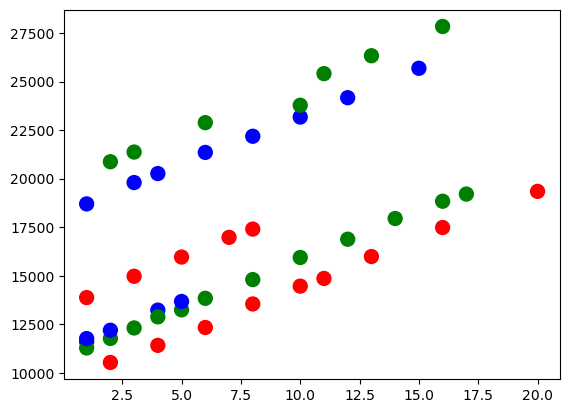

In [47]:
df = salary.copy()
plt.scatter(df['experience'], df['salary'], c=df['education'].apply(lambda x:colors_edu[x]), s=100)
plt.show()

#### Scatter plot with colors and symbols

In [50]:
# define colors / symbols manually
symbols_mang = dict(Y="*", N=".")
# symbols_mang = {'Y':'*', 'N':'.'}
colors_edu = {'Bachelor':'r', 'Master':'g', 'Ph.D':'blue'}
print (symbols_mang, type(symbols_mang))
print (colors_edu, type(colors_edu))

{'Y': '*', 'N': '.'} <class 'dict'>
{'Bachelor': 'r', 'Master': 'g', 'Ph.D': 'blue'} <class 'dict'>


In [52]:
## Figure size
# group by education x management => 3 x 2 = 6 groups or combinations
for values, data_df in df.groupby(['education', 'management']):
    print (values, ":\n", data_df)

('Bachelor', 'N') :
     salary  experience education management
7    10535           2  Bachelor          N
13   11417           4  Bachelor          N
20   12336           6  Bachelor          N
28   13548           8  Bachelor          N
29   14467          10  Bachelor          N
34   14861          11  Bachelor          N
37   15990          13  Bachelor          N
43   17483          16  Bachelor          N
45   19346          20  Bachelor          N
('Bachelor', 'Y') :
     salary  experience education management
0    13876           1  Bachelor          Y
10   14975           3  Bachelor          Y
19   15965           5  Bachelor          Y
24   16978           7  Bachelor          Y
26   17404           8  Bachelor          Y
('Master', 'N') :
     salary  experience education management
3    11283           1    Master          N
6    11772           2    Master          N
9    12313           3    Master          N
16   12884           4    Master          N
17   13245     

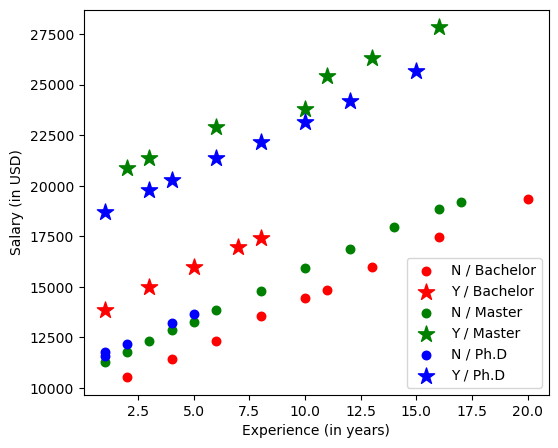

In [60]:
## Figure size
plt.figure(figsize=(6,5))
# group by education x management => 3 x 2 = 6 groups or combinations
for values, data in df.groupby(['education', 'management']):
    # print (values, ":\n", data)
    edu, manager = values
    plt.scatter(data['experience'], data['salary'], marker=symbols_mang[manager], 
               color=colors_edu[edu], s=150, label=manager + " / " + edu)
# set labels
plt.xlabel('Experience (in years)')
plt.ylabel('Salary (in USD)')
plt.legend(loc=4)
plt.show()

#### Saving Figures

In [ ]:
plt.plot(x, sinus)
plt.savefig("Figure-1.png")
plt.close()

In [ ]:
plt.plot(x, sinus)
plt.savefig("Figure-1.pdf")
plt.close()

#### Boxplot

<Axes: xlabel='education', ylabel='salary'>

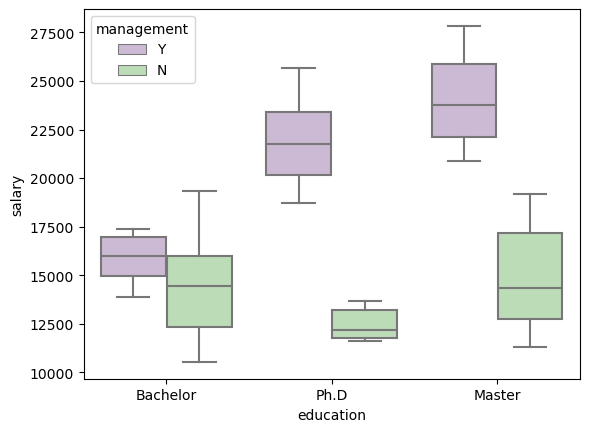

In [3]:
import seaborn as sns
sns.boxplot(x='education', y='salary', hue='management', data=salary, palette='PRGn')

<Axes: xlabel='management', ylabel='salary'>

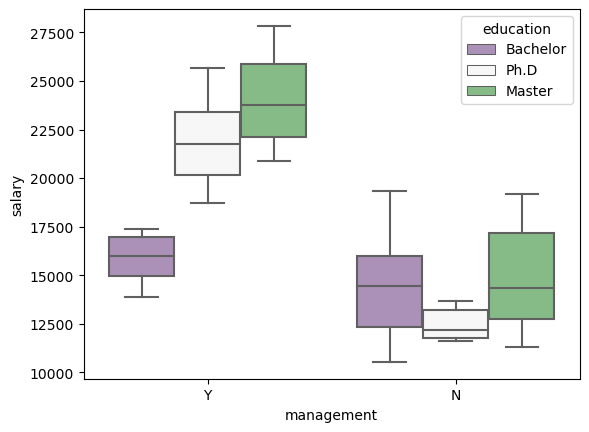

In [4]:
sns.boxplot(x='management', y='salary', hue='education', data=salary, palette='PRGn')

<Axes: xlabel='salary', ylabel='management'>

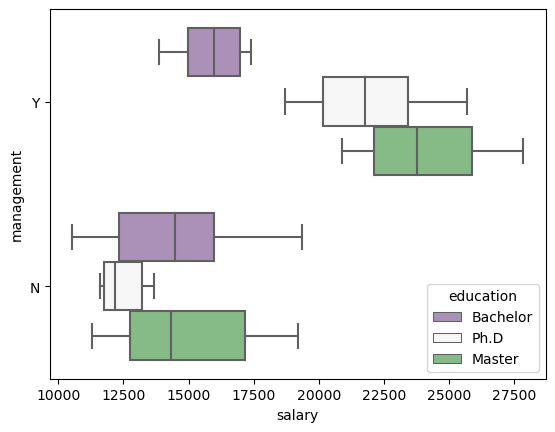

In [5]:
sns.boxplot(x='salary', y='management', hue='education', data=salary, palette='PRGn')

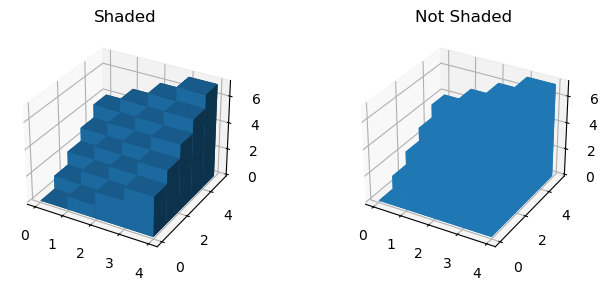

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# set up the figure and axes
fig = plt.figure(figsize=(8, 3))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

# fake data
_x = np.arange(4)
_y = np.arange(5)
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

top = x + y
bottom = np.zeros_like(top)
width = depth = 1

ax1.bar3d(x, y, bottom, width, depth, top, shade=True)
ax1.set_title('Shaded')

ax2.bar3d(x, y, bottom, width, depth, top, shade=False)
ax2.set_title('Not Shaded')

plt.show()

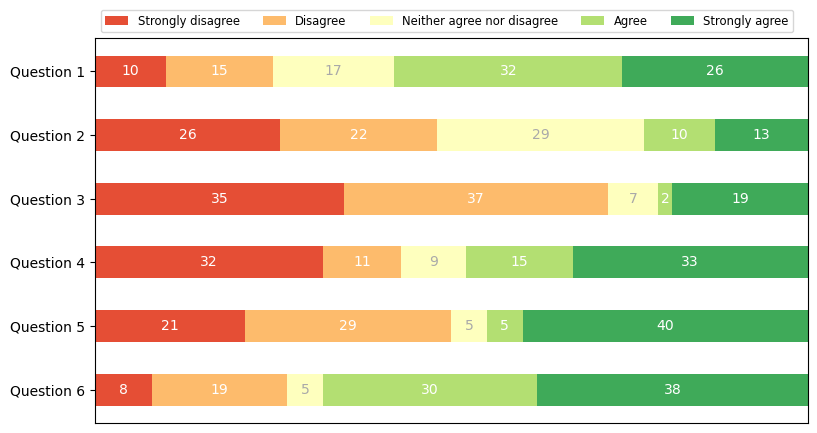

In [7]:
import matplotlib.pyplot as plt
import numpy as np

category_names = ['Strongly disagree', 'Disagree',
                  'Neither agree nor disagree', 'Agree', 'Strongly agree']
results = {
    'Question 1': [10, 15, 17, 32, 26],
    'Question 2': [26, 22, 29, 10, 13],
    'Question 3': [35, 37, 7, 2, 19],
    'Question 4': [32, 11, 9, 15, 33],
    'Question 5': [21, 29, 5, 5, 40],
    'Question 6': [8, 19, 5, 30, 38]
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn'](
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncols=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)
plt.show()

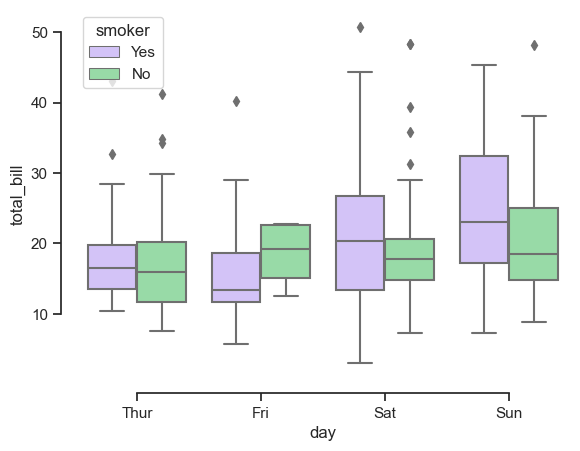

In [11]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="day", y="total_bill",
            hue="smoker", palette=["m", "g"],
            data=tips)
sns.despine(offset=10, trim=True)